<a href="https://colab.research.google.com/github/sk1252k5/deeplearning_TF_Keras/blob/main/mini_batch_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df = pd.read_csv('/content/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
sc = preprocessing.MinMaxScaler()
scaled_x =sc.fit_transform(df.drop('price',axis = 'columns'))
scaled_y = sc.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [5]:
scaled_x.shape

(20, 2)

In [6]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [7]:
def mini_batch_gradiant_decent(x,y_true,epochs,b_size = 5,l_rate = 0.01):
    number_of_features = x.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []
    num_batches = int(total_samples/b_size)
    for i in range(epochs):
      random_index = np.random.permutation(total_samples)
      sample_x = x[random_index]
      sample_y = y_true[random_index]
      for j in range(0,total_samples,b_size):
            Xj = sample_x[j:j+b_size]
            yj = sample_y[j:j+b_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w = w - l_rate * w_grad
            b = b - l_rate * b_grad

            cost = np.mean(np.square(yj-y_predicted))
            if i%100==0: # at every 100th iteration record the cost and epoch value
              cost_list.append(cost)
              epoch_list.append(i)
    return w, b, cost,cost_list,epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradiant_decent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    b_size = 5
)
w, b, cost

(array([0.71014107, 0.67820879]), -0.2331850303896294, 0.012309535785591838)

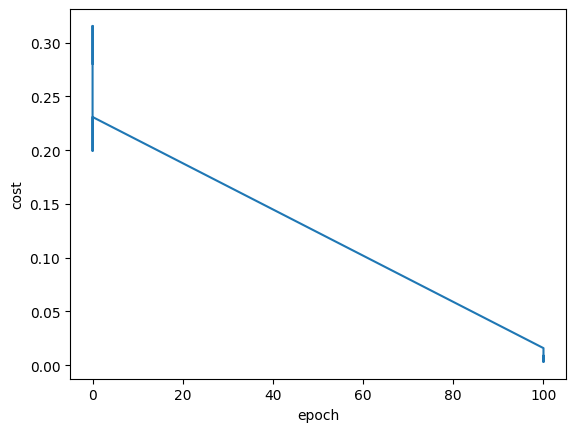

In [8]:
# visualizing the flow of the mini batch gradiant decent
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)